In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1b

Let $^cF_{a-cc}$ be the flux of carbon from the atmosphere to the continental crust.

In this model, we assume that $^cF_{a-cc}(t) = 0$ for $0 \le t < t_1$ where $t_1 = 0.5$ Gyr. 

For $t_1 \le t < t_2$, we assume that $^cF_{a-cc}(t) = \frac{M_{a0}}{\tau_1}]$ where $t_2=2$ Gyr. 

Lastly, for $t_2 \le t < t_p$, we have $^cF_{a-cc}(t) = \frac{M_{a0}}{\tau_1} e^{\frac{t-t_2}{\tau_2}}$ such that at $t = t_2$, $^cF_{a-cc}$ is continuous.


In [33]:
from scipy.integrate import odeint

def calc_t_2(cMa0, cMa_2, t_1, tau_1):
    return tau_1 * (-(cMa_2/cMa0) + 1) + t_1

def f(y, t, params):
    cMa = y

    t_1, t_2, t_p, tau_1, tau_2, cMa0, cMa_2 = params
   
    if (t == t_2):
        cMa = cMa_2
        
    if (0 <= t and t < t_1):
        return 0
    elif (t_1 <= t < t_2):
        return -cMa0/tau_1
    else:
        return -cMa/tau_2

# Parameters
t_1 = 0.5 #Gyr
t_p = 4.4 #Gyr
tau_1 = 1.5 #Gyr
cMa0 = 1.57e8 #Gt
cMa_2 = 1e5 #Gt
tau_2 = cMa_2 * (tau_1/cMa0)
t_2 = calc_t_2(cMa0, cMa_2, t_1, tau_1) #Gyr

ts = 1e4

# Bundle parameters for ODE solver
params = [t_1, t_2, t_p, tau_1, tau_2, cMa0, cMa_2]

# Bundle initial conditions for ODE solver
y0 = [cMa0]
    
t = np.linspace(0,t_p,ts)
solution = odeint(f, y0, t, args=(params,))
print(t_2)

1.9990445859872612


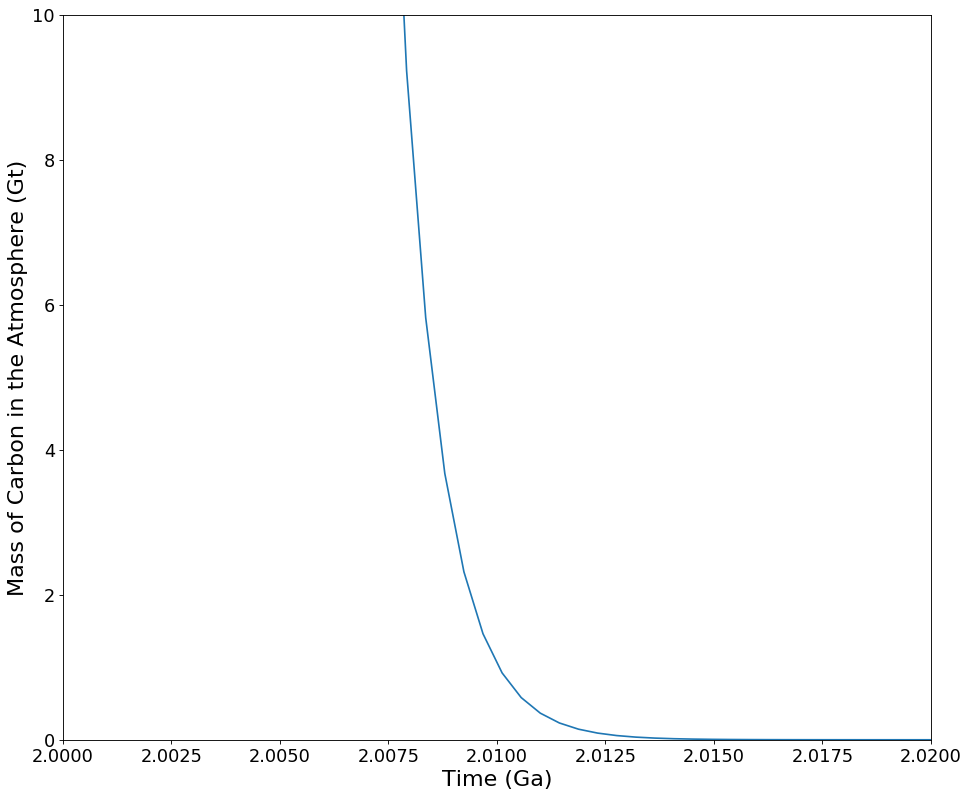

In [32]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, solution)
plt.xlim([2,2.02])
plt.ylim([0,1e1])
axes = plt.gca()
#axes.set_yscale('log')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)

plt.xlabel("Time (Ga)", fontsize=20)
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)", fontsize=20);

We begin with the $^cM_{a}(t_p) = 2e3$ Gt (approx. 1000 ppmv). Furthermore, we assume that $F_{cc-m} = 36$ Mt/yr. Thus, $\tau_2 = \frac{M_{a}(t_p)}{F_{cc-m}}$

In [25]:
from scipy.integrate import odeint

def calc_t_2(cMa0, cMa_t2, t_1, tau_1):
    return tau_1 * (-(cMa_t2/cMa0) + 1) + t_1

def f(y, t, params):
    cMa = y

    t_0, t_1, t_2, t_p, tau_1, tau_2, cMa0, cMa_t2 = params
   
    if (t == t_2):
        cMa = cMa_t2
        
    if (t_0 <= t and t < t_1):
        return 0
    elif (t_1 <= t < t_2):
        return -cMa0/tau_1
    else:
        return -cMa/tau_2

# Parameters
t_0 = 0   #Gyr
t_1 = 0.5 #Gyr
t_p = 4.4 #Gyr
F_ccm = 35e-3 #Gt/yr
F_acc = 105e-3 #Gt/yr
cMa_tp = 2e3 #Gt
tau_2 = cMa_tp/F_ccm #yr
cMa_t2 = F_acc * tau_2 #Gt
cMa0 = 1.57e8 #Gt
tau_1 = cMa0*tau_2/cMa_t2 #yr
tau_2 = tau_2*1e-9
tau_1 = tau_1*1e-9

t_2 = calc_t_2(cMa0, cMa_t2, t_1, tau_1) #Gyr

ts = 1e3

# Bundle parameters for ODE solver
params = [t_0, t_1, t_2, t_p, tau_1, tau_2, cMa0, cMa_t2]

# Bundle initial conditions for ODE solver
y0 = [cMa0]
    
t = np.linspace(0,t_p,ts)
solution = odeint(f, y0, t, args=(params,))
print(solution)

[[  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]
 [  1.57000000e+08]


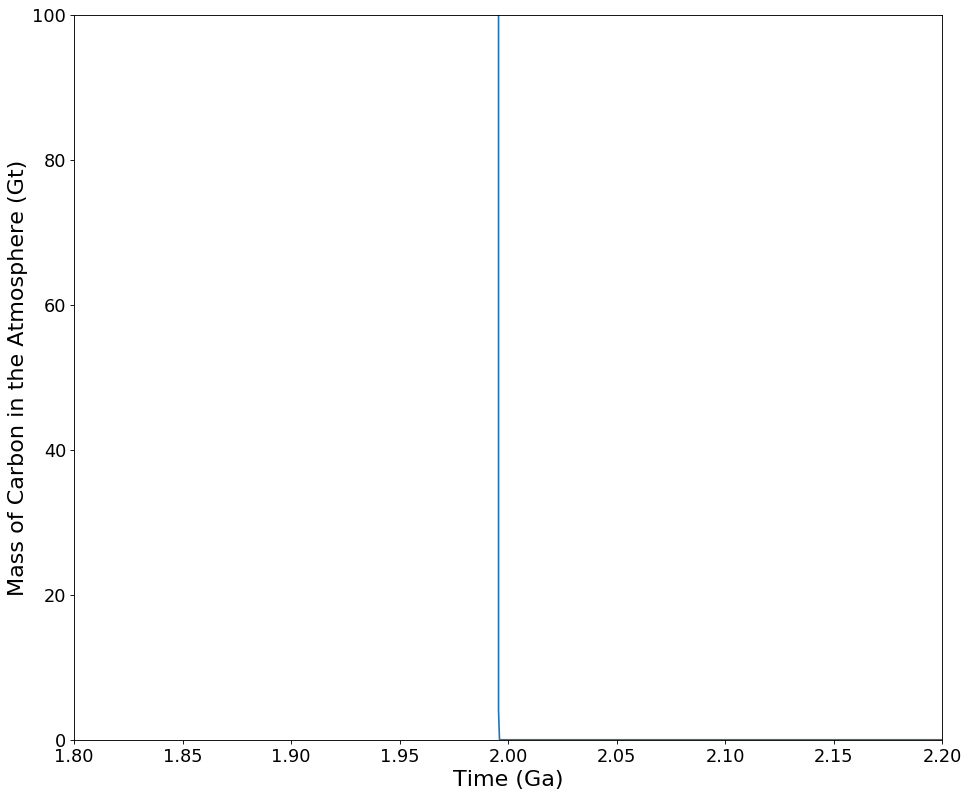

In [23]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, solution)
plt.xlim([1.8,2.2])
plt.ylim([0,1e2])
axes = plt.gca()
#axes.set_yscale('log')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)

plt.xlabel("Time (Ga)", fontsize=20)
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)", fontsize=20);